**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

Descriptive Analytics for Numerical Columns

●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

●	Steps:

  Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

  Identify numerical columns in the dataset.

  Calculate the mean, median, mode, and standard deviation for these columns.

  Provide a brief interpretation of these statistics


In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('sales_data_with_discounts.csv')


In [7]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


## Identify Numerical Columns



In [23]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
print("Numerical columns identified:")
print(numerical_columns)

Numerical columns identified:
['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


## Identify Categorical Columns




In [24]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print("Initial categorical columns identified:")
print(categorical_columns)
selected_categorical_columns = []
print("Analyzing unique values for each categorical column:")
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Column: {col}, Unique values: {unique_count}")
    if unique_count < 50:
        selected_categorical_columns.append(col)
    else:
        print(f"  Skipping '{col}' due to a large number of unique values ({unique_count}).")

print("Selected categorical columns for plotting (less than 50 unique values):")
print(selected_categorical_columns)

Initial categorical columns identified:
['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
Analyzing unique values for each categorical column:
Column: Date, Unique values: 15
Column: Day, Unique values: 7
Column: SKU, Unique values: 30
Column: City, Unique values: 1
Column: BU, Unique values: 3
Column: Brand, Unique values: 9
Column: Model, Unique values: 30
Selected categorical columns for plotting (less than 50 unique values):
['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


finding mean,median,mode,std dev


In [27]:
print("Descriptive Statistics for Numerical Columns:")
for col in numerical_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().tolist()
    std_dev_val = df[col].std()
    print(f"Column: {col}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print(f"  Standard Deviation: {std_dev_val:.2f}")

Descriptive Statistics for Numerical Columns:
Column: Volume
  Mean: 5.07
  Median: 4.00
  Mode: [3]
  Standard Deviation: 4.23
Column: Avg Price
  Mean: 10453.43
  Median: 1450.00
  Mode: [400, 450, 500, 1300, 8100]
  Standard Deviation: 18079.90
Column: Total Sales Value
  Mean: 33812.84
  Median: 5700.00
  Mode: [24300]
  Standard Deviation: 50535.07
Column: Discount Rate (%)
  Mean: 15.16
  Median: 16.58
  Mode: [5.007822189204133, 5.055218412429214, 5.059801277154096, 5.072124185625713, 5.084108426, 5.252112549273296, 5.4118021861669225, 5.420506661087877, 5.425910532590122, 5.466379335661308, 5.485156670073213, 5.511042321019265, 5.553719335858815, 5.794802079132935, 5.870670938165718, 5.935084193732397, 6.008199566158192, 6.066191918625036, 6.095201440402829, 6.106930704565366, 6.170397894995827, 6.214888201701022, 6.268913808500697, 6.326891692775114, 6.415230294327099, 6.439919959844064, 6.473304705016388, 6.508719077620175, 6.642595335085532, 6.710453536396899, 6.819110662867

**visulization**

Visualizing relationships between numerical and categorical columns:


/tmp/ipython-input-3177279583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')
/tmp/ipython-input-3177279583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')
/tmp/ipython-input-3177279583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')
/tmp/ipython-input-3177279583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

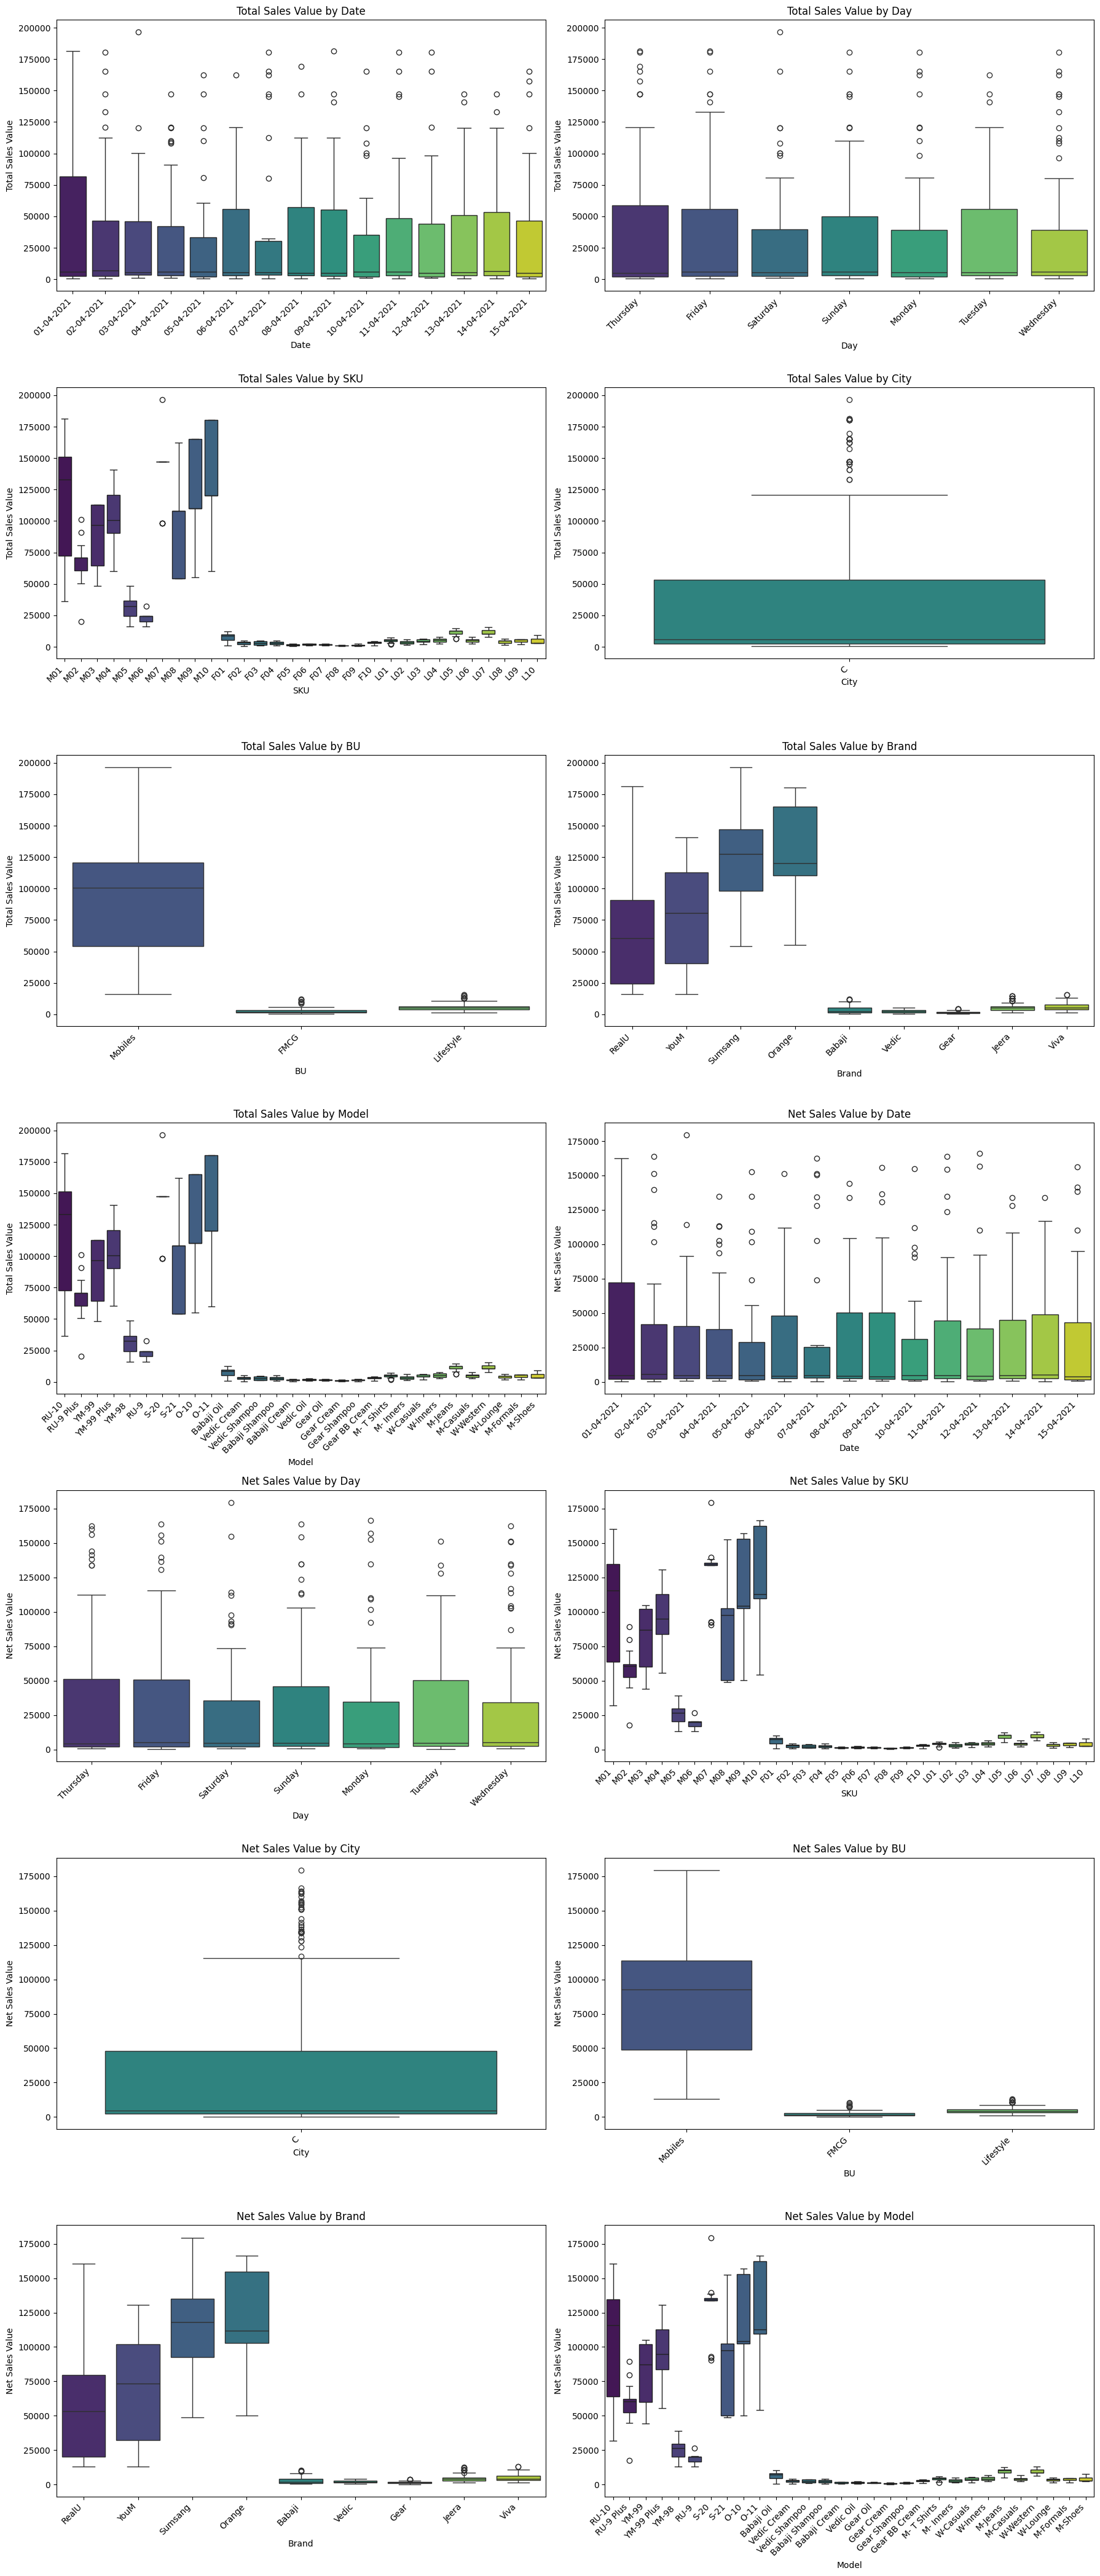

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing relationships between numerical and categorical columns:")

numerical_cols_for_rel = ['Total Sales Value', 'Net Sales Value']

# Calculate the number of subplots needed
num_plots = len(selected_categorical_columns) * len(numerical_cols_for_rel)
num_rows = (num_plots + 1) // 2  # Arrange in 2 columns

plt.figure(figsize=(18, 6 * num_rows))

plot_index = 1
for num_col in numerical_cols_for_rel:
    for cat_col in selected_categorical_columns:
        plt.subplot(num_rows, 2, plot_index)
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plot_index += 1

plt.tight_layout()
plt.show()

Visualizing relationships between numerical and categorical columns:


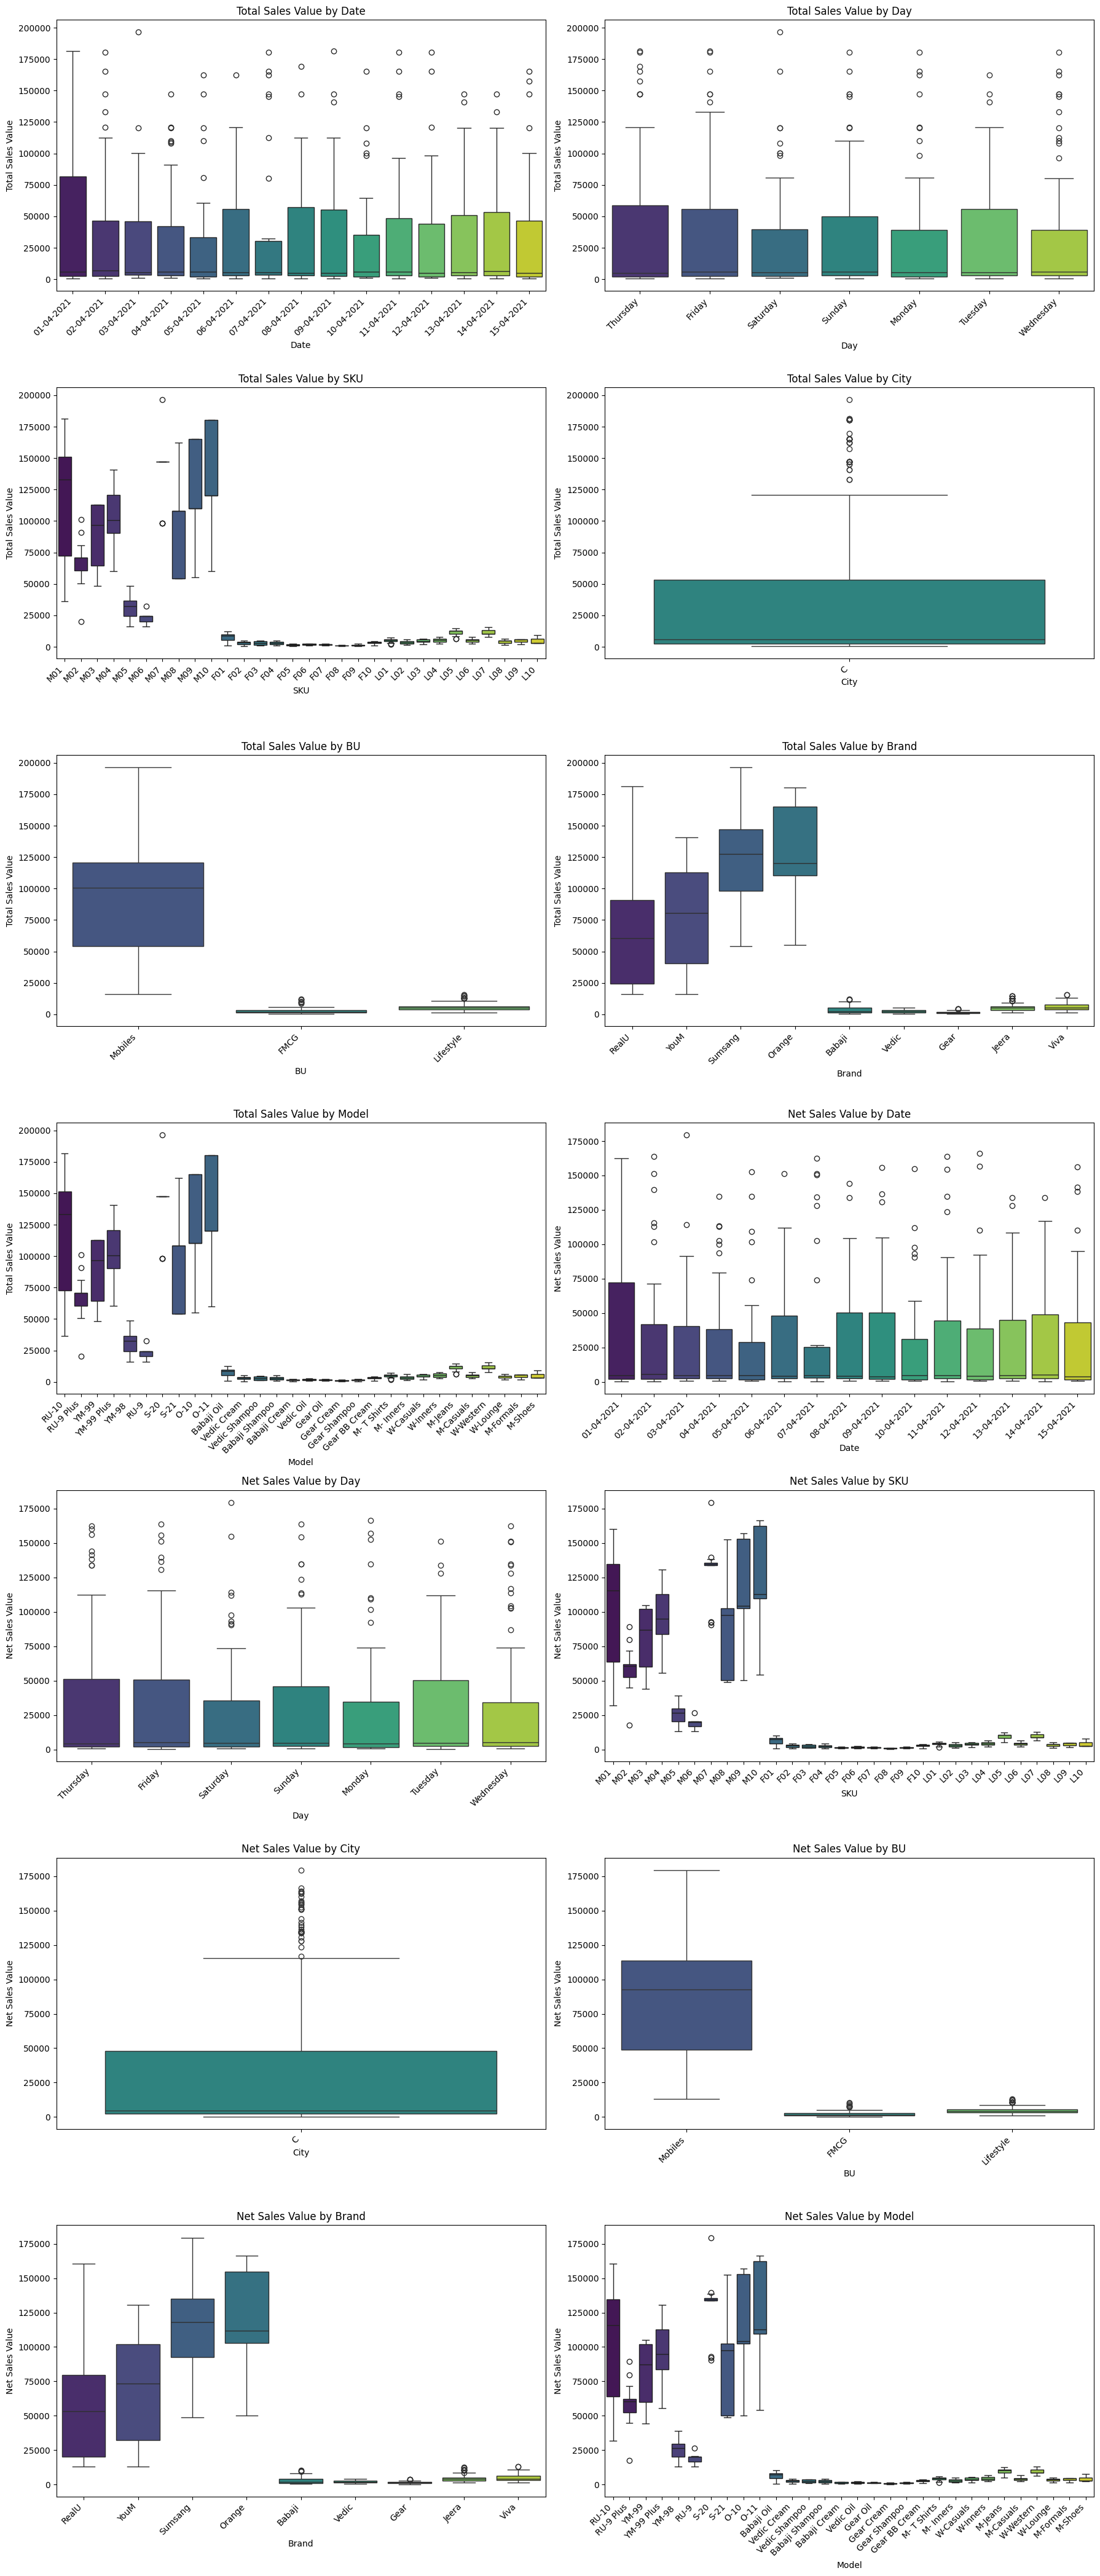

In [28]:


print("Visualizing relationships between numerical and categorical columns:")

numerical_cols_for_rel = ['Total Sales Value', 'Net Sales Value']

num_plots = len(selected_categorical_columns) * len(numerical_cols_for_rel)
num_rows = (num_plots + 1) // 2

plt.figure(figsize=(18, 6 * num_rows))

plot_index = 1
for num_col in numerical_cols_for_rel:
    for cat_col in selected_categorical_columns:
        plt.subplot(num_rows, 2, plot_index)
        sns.boxplot(data=df, x=cat_col, y=num_col, hue=cat_col, palette='viridis', legend=False)
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plot_index += 1

plt.tight_layout()
plt.show()

## Visualize Distributions of Numerical Columns




Generating histograms and box plots for numerical columns...


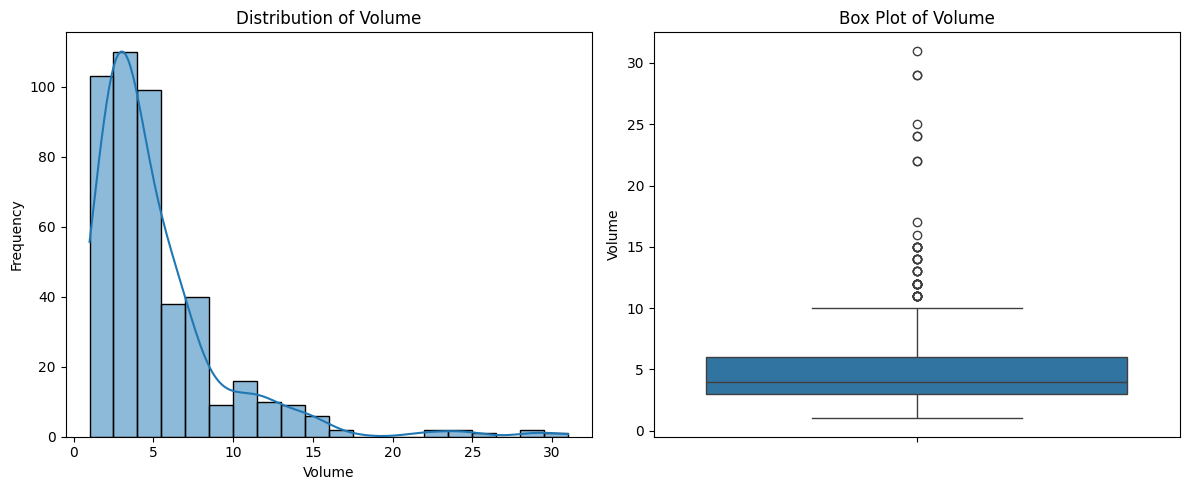

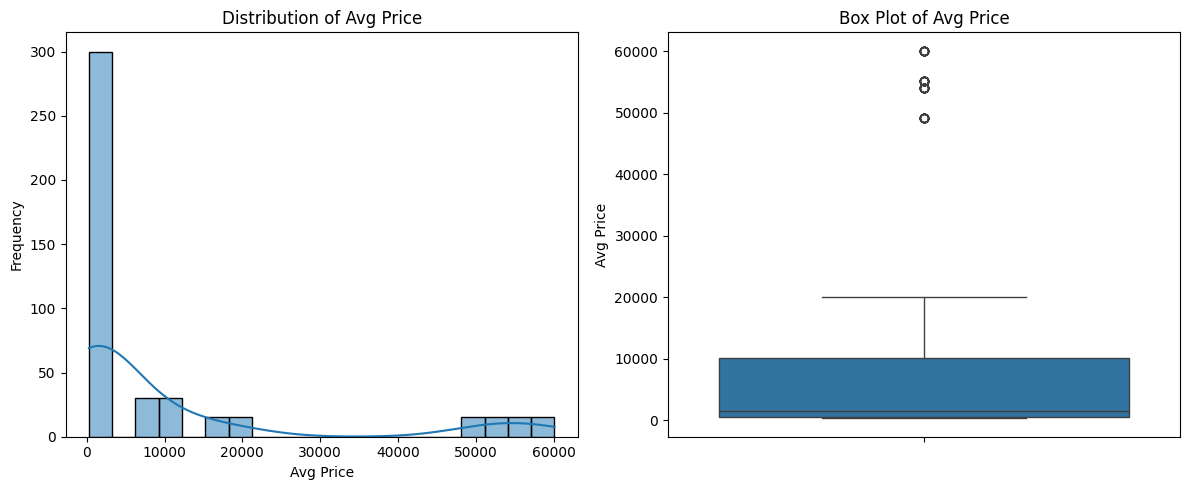

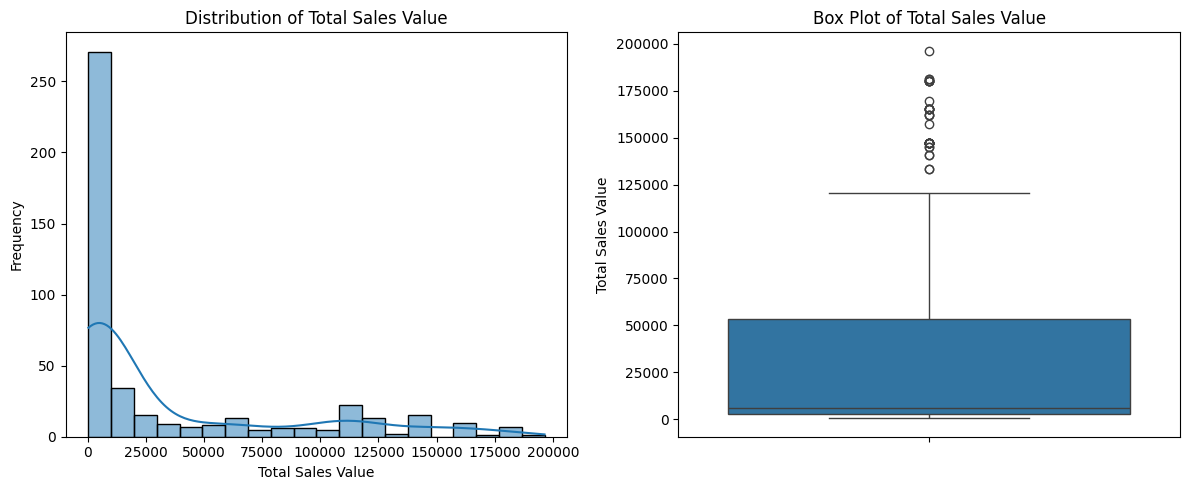

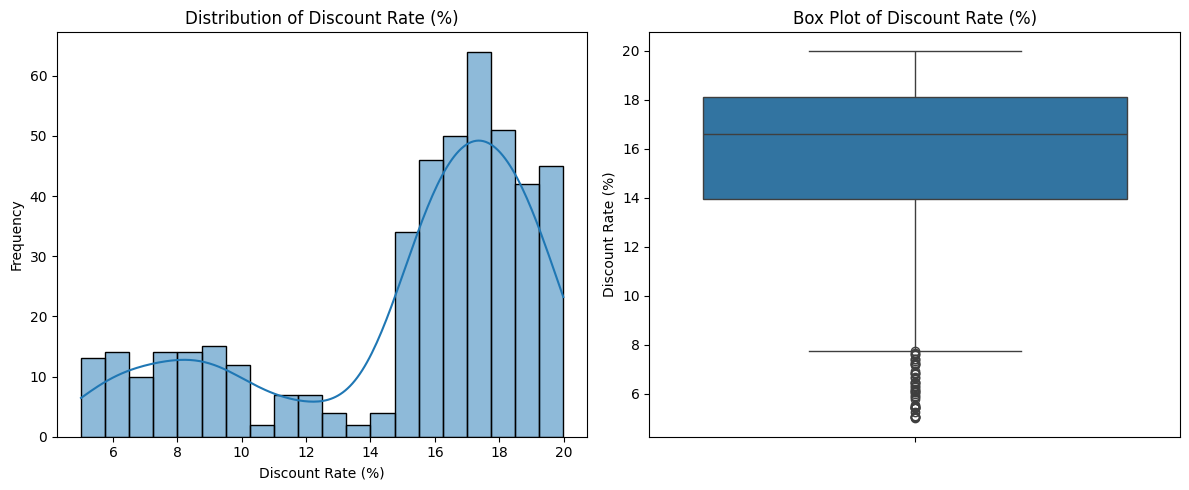

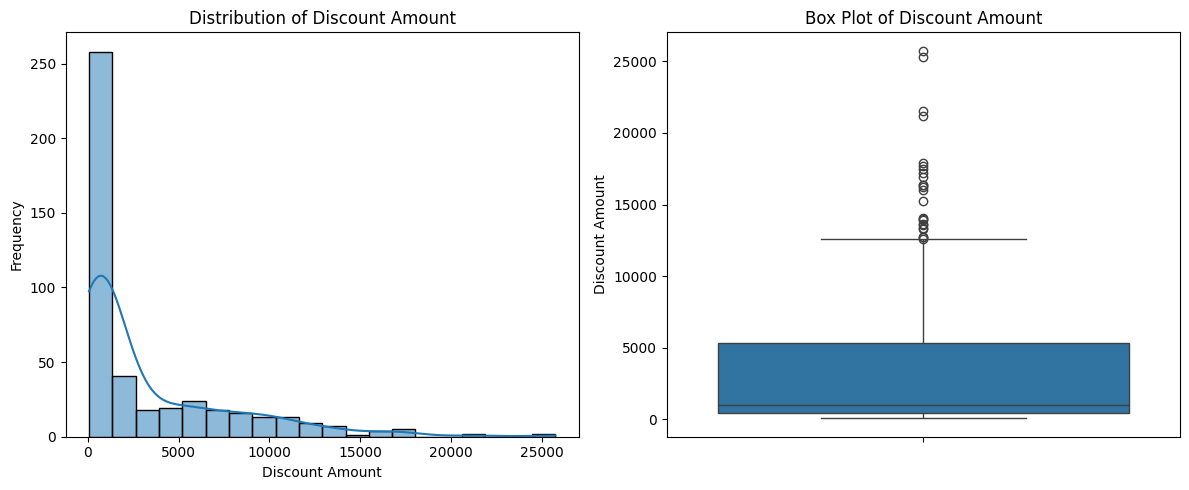

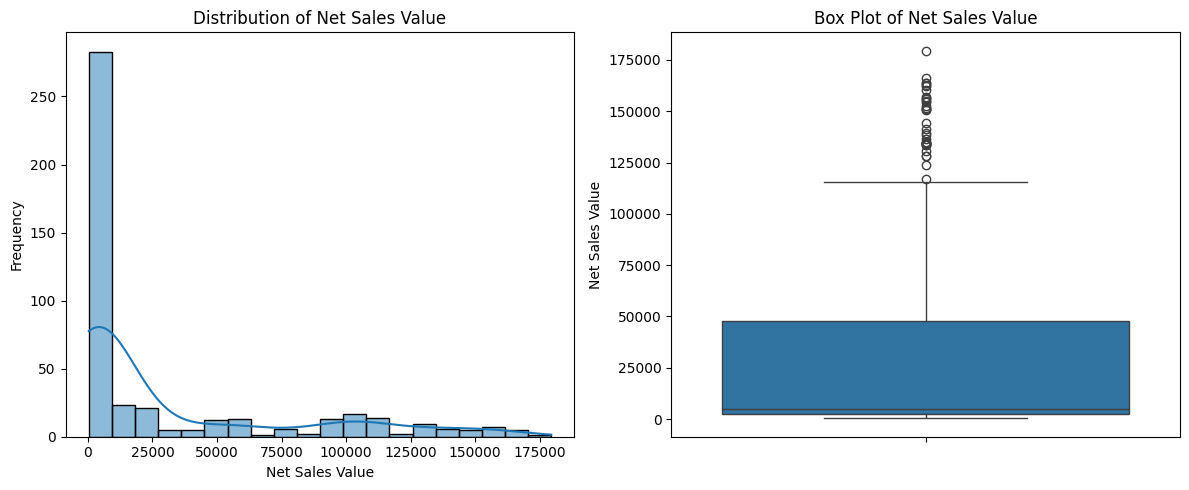

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating histograms and box plots for numerical columns...")

for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


**Standardization of Numerical Variables**

●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

●	Steps:

  Explain the concept of standardization (z-score normalization).

  Standardize the numerical columns using the formula: z=x-mu/sigma


  Show before and after comparisons of the data distributions.


**concept of standardization**

It is a crucial data preprocessing technique used to transform data so that it has a mean of 0 and a standard deviation of 1

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_data = scaler.fit_transform(df[numerical_columns])
df_scaled = pd.DataFrame(df_scaled_data, columns=numerical_columns)

print("Standardized DataFrame (df_scaled):")
print(df_scaled.head())

Standardized DataFrame (df_scaled):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


**before and after standardization**

Generating plots to compare distributions before and after standardization...


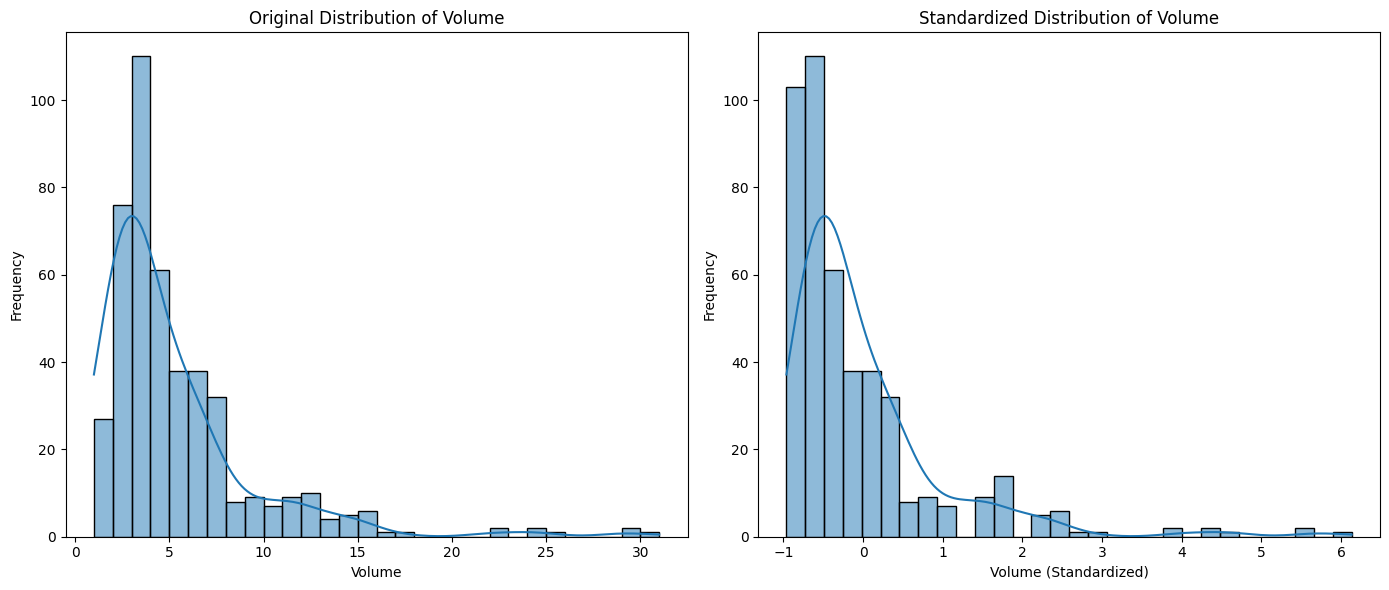

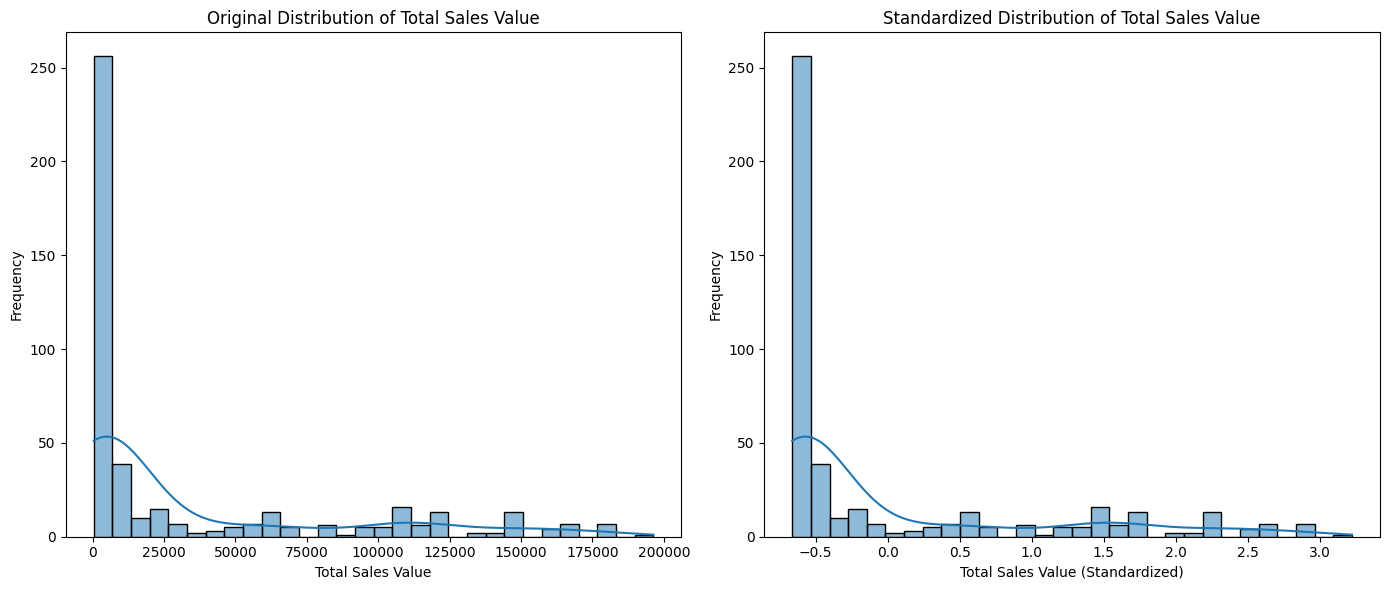

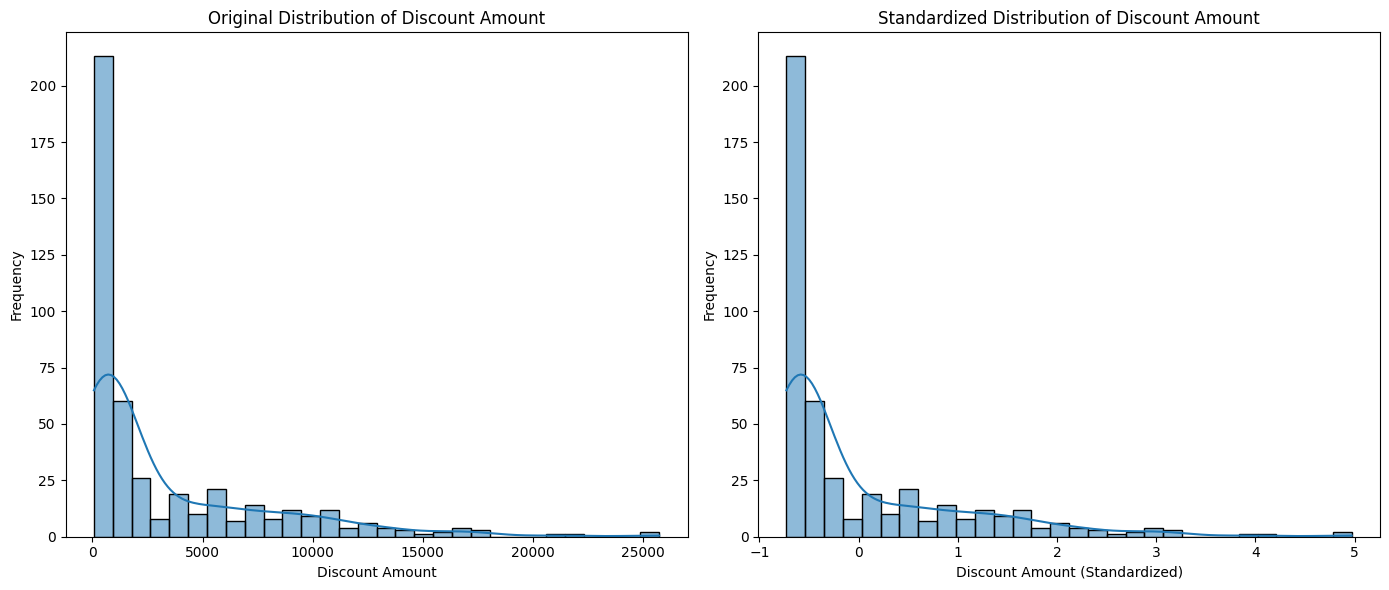

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating plots to compare distributions before and after standardization...")


selected_numerical_cols = ['Volume', 'Total Sales Value', 'Discount Amount']

for col in selected_numerical_cols:
    plt.figure(figsize=(14, 6))

    # Plot original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Original Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot standardized distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f'Standardized Distribution of {col}')
    plt.xlabel(f'{col} (Standardized)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



**Conversion of Categorical Data into Dummy Variables**

●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.

●	Steps:

  Discuss the need for converting categorical data into dummy variables (one-hot encoding).

  Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

  Display a portion of the transformed dataset.


In [18]:
print("Applying one-hot encoding to selected categorical columns...")
df_encoded_categorical = pd.get_dummies(df[selected_categorical_columns], drop_first=True)

df_processed = pd.concat([df_scaled, df_encoded_categorical], axis=1)
print("Processed DataFrame after standardization and one-hot encoding (df_processed):")
print(df_processed.head())

Applying one-hot encoding to selected categorical columns...
Processed DataFrame after standardization and one-hot encoding (df_processed):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4       

In [19]:
print(df_processed.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          

In [20]:
print("Converting boolean one-hot encoded columns to integer (0 or 1) form...")
df_encoded_categorical_int = df_encoded_categorical.astype(int)

print("Head of one-hot encoded DataFrame with integer values:")
print(df_encoded_categorical_int.head())

Converting boolean one-hot encoded columns to integer (0 or 1) form...
Head of one-hot encoded DataFrame with integer values:
   Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  Date_05-04-2021  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  Date_09-04-2021  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0 

In [21]:
df_processed_int = pd.concat([df_scaled, df_encoded_categorical_int], axis=1)

print("Processed DataFrame after standardization and integer one-hot encoding (df_processed_int):")
print(df_processed_int.head())

Processed DataFrame after standardization and integer one-hot encoding (df_processed_int):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756                0                0                0   
1         1.271026                0                0                0   
2         1.545675                0                0                0   
3         1.765810                0                0                0   
4        -0.227595                0                0     

key findings

##

*   All sales data originated from a single city, 'C'.

*   The 'Date', 'SKU', and 'Model' categories showed a uniform distribution

*   'Thursday' and 'Friday' exhibited higher frequencies in the dataset, suggesting increased activity on these days.

*   The 'Electronics' Business Unit (BU) was the most frequent, followed by 'Lifestyle' and 'Mobiles'. 'RealU' and 'YouM' were the most frequent brands observed.




*   Sales values were highly volatile across various categories, with numerous high-value outliers indicating infrequent but substantial transactions, particularly on 'Thursdays'.


the standardization  improved the regularization performance and equally featured for further model learning

one hot encoding

converting the non-numericals to numerical values to process and understand

many algorithms work effectively with this

##
 the data is ready for further steps like machine learning model development.
